In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def escala(img, sx, sy):

    matriz_escala = np.array([[sx, 0, 0], 
                              [0, sy, 0], 
                              [0, 0, 1]])
    altura, largura = img.shape
    img_escalada = np.zeros((altura * sy, largura * sx))

    for y in range(altura):
        for x in range(largura):
            resultado = np.dot(matriz_escala, [x, y, 1])
            
            img_x = int(resultado[0])
            img_y = int(resultado[1])
            
            img_escalada[img_y, img_x] = img[y, x]
                
    return img_escalada

In [14]:
def rotacao(img, angulo):
    
    altura, largura = img.shape
    angulo_rad = np.deg2rad(angulo)
    centro_x, centro_y = largura / 2, altura / 2
    
    img_rotacionada = np.zeros_like(img)

    cos = np.cos(angulo_rad)
    sin = np.sin(angulo_rad)
    
    matriz_rotacao = np.array([[cos, -sin, 0], 
                               [sin, cos, 0], 
                               [0, 0, 1]])
    
    matriz_translacao_origem = np.array([[1, 0, centro_y], 
                                         [0, 1, centro_x], 
                                         [0, 0, 1]])
    matriz_translacao = np.array([[1, 0, -centro_y], 
                                  [0, 1, -centro_x], 
                                  [0, 0, 1]])
    
    matriz_composta = np.dot( matriz_translacao_origem,np.dot( matriz_rotacao,matriz_translacao))

    for y in range(altura):
        for x in range(largura):

            resultado = np.dot(matriz_composta, [x, y, 1])
            
            img_x = int(resultado[0])
            img_y = int(resultado[1])
            if 0 <= img_x < largura and 0 <= img_y < altura:
                img_rotacionada[img_y, img_x] = img[y, x]
                
    return img_rotacionada

In [15]:
def cisalhamento(img, shear_x=0, shear_y=0):
    altura, largura = img.shape
    img_cizalhada = np.zeros_like(img)
    
    matriz_cisalhamento = np.array([[1, shear_x, 0], 
                                    [shear_y, 1, 0], 
                                    [0, 0, 1]])
    
    for y in range(altura):
        for x in range(largura):
            resultado = np.dot(matriz_cisalhamento, [x, y, 1])
            img_x = int(resultado[0])
            img_y = int(resultado[1])
            
            if 0 <= img_x < largura and 0 <= img_y < altura:
                img_cizalhada[img_y, img_x] = img[y, x]
                
    return img_cizalhada

In [16]:
def vizinho_proximo(img, img_original, matriz_transformacao):
    altura, largura = img.shape
    img_copia = img.copy()
    matriz_inversa = np.linalg.inv(matriz_transformacao)
    
    for y in range(altura):
        for x in range(largura):
            resultado = np.dot(matriz_inversa, [x, y, 1])
            
            img_x = int(resultado[0])
            img_y = int(resultado[1])
            
            if 0 <= img_x < largura and 0 <= img_y < altura:
                img_copia[y, x] = img_original[img_y, img_x]
    
    return img_copia

In [17]:
def bilinear(img,  img_original, transformation_matrix):
	altura_nova, largura_nova = img.shape
	altura_antiga, largura_antiga = img_original.shape
 
	inv_matrix = np.linalg.inv(transformation_matrix)

	for i in range(altura_nova):
		for j in range(largura_nova):
			result = np.dot(inv_matrix, [j, i, 1])
   
			x = result[0]
			y = result[1]

			x0 = np.floor(x).astype(int)
			x1 = x0 + 1
			y0 = np.floor(y).astype(int)
			y1 = y0 + 1

			x0 = np.clip(x0, 0, largura_antiga-1)
			x1 = np.clip(x1, 0, largura_antiga-1)
			y0 = np.clip(y0, 0, altura_antiga-1)
			y1 = np.clip(y1, 0, altura_antiga-1)

			top_left = img_original[ y0, x0 ]
			bottom_left = img_original[ y1, x0 ]
			top_right = img_original[ y0, x1 ]
			bottom_right = img_original[ y1, x1 ]

			w_top_left = (x1-x) * (y1-y)
			w_bottom_left = (x1-x) * (y-y0)
			w_top_right = (x-x0) * (y1-y)
			w_bottom_right = (x-x0) * (y-y0)

			img[i,j] = w_top_left*top_left + w_bottom_left*bottom_left + w_top_right*top_right + w_bottom_right*bottom_right

	return img


In [18]:
img_original = cv2.imread('img/circle.png', cv2.IMREAD_GRAYSCALE)

sx = 2
sy = 2
img_escalada = escala(img_original, sx, sy)

angulo = 30
img_rotacionada = rotacao(img_original, angulo)

shear_x = 0.8
shear_y = 0.6
img_cizalhada = cisalhamento(img_original, shear_x, shear_y)

In [19]:
altura, largura = img_original.shape

angulo_rad = np.deg2rad(angulo)
centro_x, centro_y = largura / 2, altura / 2
cos = np.cos(angulo_rad)
sin = np.sin(angulo_rad)

matriz_translacao_origem = np.array([[1, 0, centro_y], 
                                     [0, 1, centro_x], 
                                     [0, 0, 1]])
matriz_translacao = np.array([[1, 0, -centro_y], 
                              [0, 1, -centro_x], 
                              [0, 0, 1]])
matriz_rotacao = np.array([[cos, -sin, 0], 
                           [sin, cos, 0], 
                           [0, 0, 1]])

matriz_escala = np.array([[sx, 0, 0], 
                          [0, sy, 0], 
                          [0, 0, 1]])
matriz_composta_rotacao = np.dot( matriz_translacao_origem,np.dot( matriz_rotacao,matriz_translacao)) 
matriz_cisalhamento = np.array([[1, shear_x, 0], 
                                [shear_y, 1, 0], 
                                [0, 0, 1]])

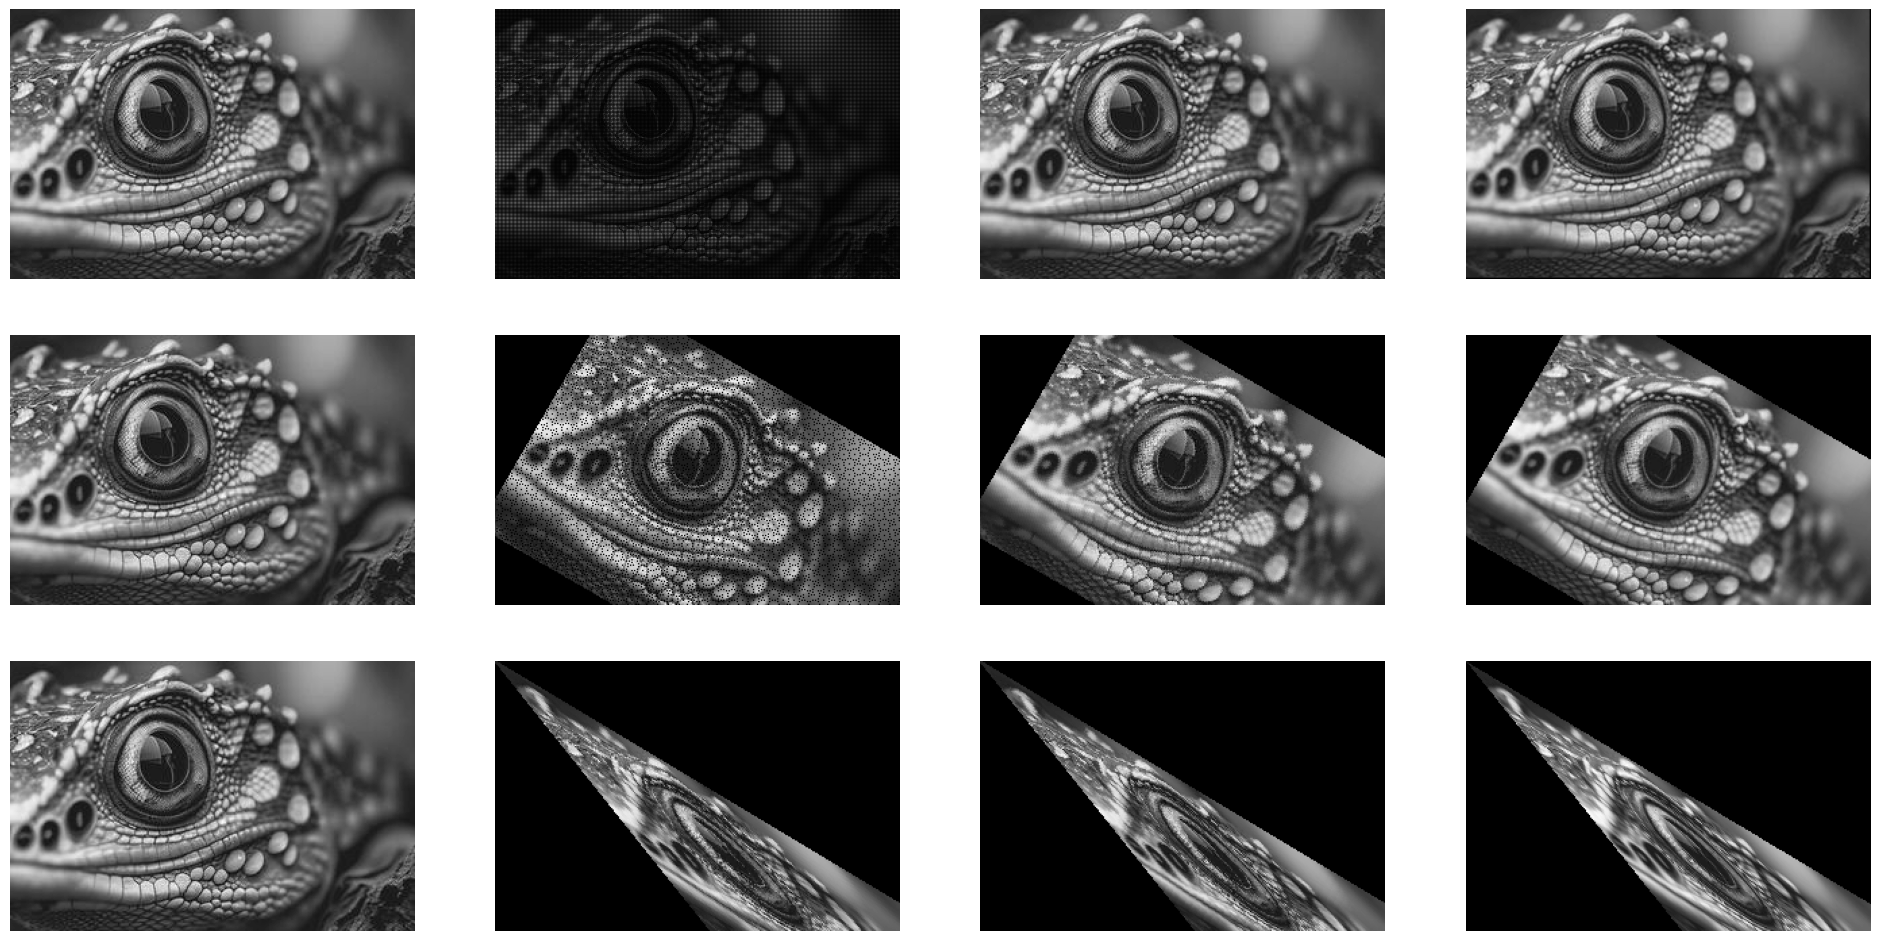

In [20]:
imgs = [img_escalada, 
        img_rotacionada, 
        img_cizalhada]

matrizes = [matriz_escala,
            matriz_composta_rotacao,
            matriz_cisalhamento]

fig, axs = plt.subplots(3, 4, figsize=(24, 12))

for i, ax in enumerate(axs):
    ax[0].imshow(img_original, cmap='gray')
    ax[0].axis('off')

    ax[1].imshow(imgs[i], cmap='gray')
    ax[1].axis('off')

    img_vizinho = vizinho_proximo(imgs[i], img_original, matrizes[i])
    ax[2].imshow(img_vizinho, cmap='gray')
    ax[2].axis('off')

    img_bilinear = bilinear(imgs[i], img_original, matrizes[i])
    ax[3].imshow(img_bilinear, cmap='gray')
    ax[3].axis('off')

plt.show()